# Lesson0 データ分析の基礎

## 目次
* Section1 ウェブからの注文数を分析する
  * 1.1 データを読み込む
  * 1.2 データを結合する
  * 1.3 データ同士を結合する
  * 1.4 マスターデータを結合する
  * 1.5 必要なデータ列を作成する
  * 1.6 データを検算する
  * 1.7 各種統計量を確認する
  * 1.8 データを月別で集計する
  * 1.9 月別、商品別で集計する
  * 1.10 商品別の売上推移を可視化する 
* Section2 小売店のデータ加工を行う
  * 1.1 データを読み込む <練習>
  * 1.2 データの"揺れ"を確認する 
  * 1.3 "揺れ"のあるデータをそのまま集計する <練習>
  * 1.4 商品名の揺れを補正する
  * 1.5 欠損値を補完する
  * 1.6 顧客名の揺れを補正する<練習>
  * 1.7 日付の揺れを補正する <練習>
  * 1.8 ２つのデータを任意のキーで結合する
  * 1.9 データをダンプする
  * 1.10 データを集計する <練習>


## Section1
データ分析の基礎を学び、いざ現場に出てみると、実際のデータに対して分析する際にいくつかの壁にぶつかります。その最初の壁は、「まず何をするのか」です。Section1では、まずウォーミングアップとして、実際のビジネス現場でデータ分析業務を行う際に、「まず何をするのか」のイメージをつかむことを目的としています。  
また、技術的には、データの読み込みや加工など、「データを扱う」という最も基本的な作業を行っていきます。  
  
ある企業のECサイトでの商品の注文数の推移を分析することによって、売上の改善を探っていくことが目的です。ECサイトのデータは、ウェブから得られるデータであることから、比較的「綺麗」なデータであることが多いですので、最初の練習題材としては望ましいと考え、今回選んでいます。

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


※MyDrive直下に機械学習プログラムフォルダ全体を格納しておくこと

In [ ]:
!ls drive/MyDrive/機械学習Python研修プログラム

00.はじめに			 03.研修_3rd_Week_実践編  99.資料群
01.研修_1st_Week_資料読み込み編  04.研修_4th_Week_実践編
02.研修_2nd_Week_実践編		 05.研修確認テスト


In [ ]:
%cd drive/MyDrive/機械学習Python研修プログラム/02.研修_2nd_Week_実践編/lesson0/

[Errno 2] No such file or directory: 'drive/MyDrive/機械学習Python研修プログラム/02.研修_2nd_Week_実践編/lesson0/DATA'
/content/drive/MyDrive/機械学習Python研修プログラム/02.研修_2nd_Week_実践編/lesson0


In [ ]:
!ls

DATA  lesson0_exercise.ipynb


### 1.1 データを読み込む

python標準ライブラリ、またはpythonのOSSを利用してデータを読み込むことが可能です。  
データ分析においては、Pandasを利用することが一般的です。

In [ ]:
import pandas as pd
customer_master = pd.read_csv('DATA/customer_master.csv')
customer_master.head()

,customer_id,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref
0,IK152942,平田 裕次郎,2019-01-01 00:25:33,ひらた ゆうじろう,hirata_yuujirou@example.com,M,29,1990/6/10,石川県
1,TS808488,田村 詩織,2019-01-01 01:13:45,たむら しおり,tamura_shiori@example.com,F,33,1986/5/20,東京都
2,AS834628,久野 由樹,2019-01-01 02:00:14,ひさの ゆき,hisano_yuki@example.com,F,63,1956/1/2,茨城県
3,AS345469,鶴岡 薫,2019-01-01 04:48:22,つるおか かおる,tsuruoka_kaoru@example.com,M,74,1945/3/25,東京都
4,GD892565,大内 高史,2019-01-01 04:54:51,おおうち たかし,oouchi_takashi@example.com,M,54,1965/8/5,千葉県


In [ ]:
item_master = pd.read_csv('DATAitem_master.csv')
item_master.head()

,item_id,item_name,item_price
0,S001,PC-A,50000
1,S002,PC-B,85000
2,S003,PC-C,120000
3,S004,PC-D,180000
4,S005,PC-E,210000


In [ ]:
transaction_1 = pd.read_csv('DATA/transaction_1.csv')
transaction_1.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [ ]:
transaction_detail_1 = pd.read_csv('DATA/transaction_detail_1.csv')
transaction_detail_1.head()

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


### 1.2 データを結合する



In [ ]:
transaction_2 = pd.read_csv('DATA/transaction_2.csv')
transaction = pd.concat([transaction_1, transaction_2], ignore_index=True)
transaction.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [ ]:
print(len(transaction_1))
print(len(transaction_2))
print(len(transaction))

5000
1786
6786


In [ ]:
transaction_detail_2 = pd.read_csv('DATA/transaction_detail_2.csv')
transaction_detail=pd.concat([transaction_detail_1,transaction_detail_2], ignore_index=True)
transaction_detail.head()

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


### 1.3 データ同士を結合する

In [ ]:
join_data = pd.merge(transaction_detail, transaction[["transaction_id", "payment_date", "customer_id"]], on="transaction_id", how="left")
join_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865


In [ ]:
print(len(transaction_detail))
print(len(transaction))
print(len(join_data))

7144
6786
7144


### 1.4 マスターデータを結合する

In [ ]:
join_data = pd.merge(join_data, customer_master, on="customer_id", how="left")
join_data = pd.merge(join_data, item_master, on="item_id", how="left")
join_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref,item_name,item_price
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,井本 芳正,2019-01-07 14:34:35,いもと よしまさ,imoto_yoshimasa@example.com,M,30,1989/7/15,熊本県,PC-E,210000
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,三船 六郎,2019-01-27 18:00:11,みふね ろくろう,mifune_rokurou@example.com,M,73,1945/11/29,京都府,PC-A,50000
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,山根 小雁,2019-01-11 08:16:02,やまね こがん,yamane_kogan@example.com,M,42,1977/5/17,茨城県,PC-C,120000
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,池田 菜摘,2019-01-10 05:07:38,いけだ なつみ,ikeda_natsumi@example.com,F,47,1972/3/17,兵庫県,PC-E,210000
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,栗田 憲一,2019-01-25 06:46:05,くりた けんいち,kurita_kenichi@example.com,M,74,1944/12/17,長崎県,PC-B,85000


### 1.5 必要なデータ列を作成する

In [ ]:
join_data["price"] = join_data["quantity"] * join_data["item_price"]
join_data[["quantity", "item_price","price"]].head()

,quantity,item_price,price
0,1,210000,210000
1,1,50000,50000
2,1,120000,120000
3,1,210000,210000
4,2,85000,170000


### 1.6 データを検算する

In [ ]:
print(join_data["price"].sum())
print(transaction["price"].sum())

971135000
971135000


In [ ]:
join_data["price"].sum() == transaction["price"].sum()

True

### 1.7 各種統計量を確認する

In [ ]:
join_data.isnull().sum()

detail_id             0
transaction_id        0
item_id               0
quantity              0
payment_date          0
customer_id           0
customer_name         0
registration_date     0
customer_name_kana    0
email                 0
gender                0
age                   0
birth                 0
pref                  0
item_name             0
item_price            0
price                 0
dtype: int64

In [ ]:
join_data.describe()

,detail_id,quantity,age,item_price,price
count,7144.000000,7144.000000,7144.000000,7144.000000,7144.000000
mean,3571.500000,1.199888,50.265677,121698.628219,135937.150056
std,2062.439494,0.513647,17.190314,64571.311830,68511.453297
min,0.000000,1.000000,20.000000,50000.000000,50000.000000
25%,1785.750000,1.000000,36.000000,50000.000000,85000.000000
50%,3571.500000,1.000000,50.000000,102500.000000,120000.000000
75%,5357.250000,1.000000,65.000000,187500.000000,210000.000000
max,7143.000000,4.000000,80.000000,210000.000000,420000.000000


In [ ]:
print(join_data["payment_date"].min())
print(join_data["payment_date"].max())

2019-02-01 01:36:57
2019-07-31 23:41:38


### 1.8 データを月別で集計する

In [ ]:
join_data.dtypes

detail_id              int64
transaction_id        object
item_id               object
quantity               int64
payment_date          object
customer_id           object
customer_name         object
registration_date     object
customer_name_kana    object
email                 object
gender                object
age                    int64
birth                 object
pref                  object
item_name             object
item_price             int64
price                  int64
dtype: object

In [ ]:
join_data["payment_date"] = pd.to_datetime(join_data["payment_date"])
join_data["payment_month"] = join_data["payment_date"].dt.strftime("%Y%m")
join_data[["payment_date", "payment_month"]].head()

,payment_date,payment_month
0,2019-02-01 01:36:57,201902
1,2019-02-01 01:37:23,201902
2,2019-02-01 02:34:19,201902
3,2019-02-01 02:47:23,201902
4,2019-02-01 04:33:46,201902


In [ ]:
join_data.groupby("payment_month").sum()["price"]

payment_month
201902    160185000
201903    160370000
201904    160510000
201905    155420000
201906    164030000
201907    170620000
Name: price, dtype: int64

### 1.9 月別、商品別で集計する

In [ ]:
join_data.groupby(["payment_month","item_name"]).sum()[["price", "quantity"]]

price  quantity
payment_month item_name                    
201902        PC-A       24150000       483
              PC-B       25245000       297
              PC-C       19800000       165
              PC-D       31140000       173
              PC-E       59850000       285
201903        PC-A       26000000       520
              PC-B       25500000       300
              PC-C       19080000       159
              PC-D       25740000       143
              PC-E       64050000       305
201904        PC-A       25900000       518
              PC-B       23460000       276
              PC-C       21960000       183
              PC-D       24300000       135
              PC-E       64890000       309
201905        PC-A       24850000       497
              PC-B       25330000       298
              PC-C       20520000       171
              PC-D       25920000       144
              PC-E       58800000       280
201906        PC-A       26000000       520
              PC-B       23970000       282
              PC-C       21840000       182
              PC-D       28800000       160
              PC-E       63420000       302
201907        PC-A       25250000       505
              PC-B       28220000       332
              PC-C       19440000       162
              PC-D       26100000       145
              PC-E       71610000       341

In [ ]:
pd.pivot_table(join_data, index='item_name', columns='payment_month', values=['price', 'quantity'], aggfunc='sum')

price                                                    \
payment_month    201902    201903    201904    201905    201906    201907   
item_name                                                                   
PC-A           24150000  26000000  25900000  24850000  26000000  25250000   
PC-B           25245000  25500000  23460000  25330000  23970000  28220000   
PC-C           19800000  19080000  21960000  20520000  21840000  19440000   
PC-D           31140000  25740000  24300000  25920000  28800000  26100000   
PC-E           59850000  64050000  64890000  58800000  63420000  71610000   

              quantity                                     
payment_month   201902 201903 201904 201905 201906 201907  
item_name                                                  
PC-A               483    520    518    497    520    505  
PC-B               297    300    276    298    282    332  
PC-C               165    159    183    171    182    162  
PC-D               173    143    135    144    160    145  
PC-E               285    305    309    280    302    341

### 1.10 商品別の売上推移を可視化する

In [ ]:
graph_data = pd.pivot_table(join_data, index='payment_month', columns='item_name', values='price', aggfunc='sum')
graph_data.head()

item_name,PC-A,PC-B,PC-C,PC-D,PC-E
payment_month,,,,,
201902,24150000,25245000,19800000,31140000,59850000
201903,26000000,25500000,19080000,25740000,64050000
201904,25900000,23460000,21960000,24300000,64890000
201905,24850000,25330000,20520000,25920000,58800000
201906,26000000,23970000,21840000,28800000,63420000


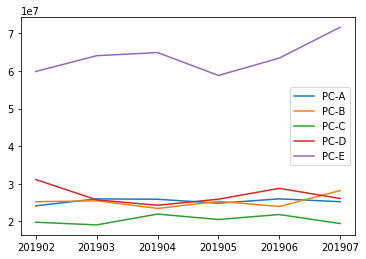

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(list(graph_data.index), graph_data["PC-A"], label='PC-A')
plt.plot(list(graph_data.index), graph_data["PC-B"], label='PC-B')
plt.plot(list(graph_data.index), graph_data["PC-C"], label='PC-C')
plt.plot(list(graph_data.index), graph_data["PC-D"], label='PC-D')
plt.plot(list(graph_data.index), graph_data["PC-E"], label='PC-E')
plt.legend()  

## Section2
大まかな流れは第1章と同じで、複数のデータを読み込み、結合した後で集計することです。しかし、第1章から異なるのは、読み込んだデータ内に表記の揺れがあることです。表計算ソフトを使用していても、例えば、名前を記入する時、人によって半角スペースを使う人もいれば、全角スペースを使う人もいるのではないでしょうか？指定されていても誤ってしまう場合もありますよね。そんな人的ミスを自動的に修正していきます。

### 2.1：データを読み込んでみよう

In [ ]:
import pandas as pd
uriage_data = pd.read_csv("DATA/uriage.csv")
uriage_data.head()

,purchase_date,item_name,item_price,customer_name
0,2019-06-13 18:02:34,商品A,100.0,深井菜々美
1,2019-07-13 13:05:29,商 品 S,NaN,浅田賢二
2,2019-05-11 19:42:07,商 品 a,NaN,南部慶二
3,2019-02-12 23:40:45,商品Z,2600.0,麻生莉緒
4,2019-04-22 03:09:35,商品a,NaN,平田鉄二


In [ ]:
kokyaku_data = pd.read_excel("DATA/kokyaku_daicho.xlsx")
kokyaku_data.head()

,顧客名,かな,地域,メールアドレス,登録日
0,須賀ひとみ,すが ひとみ,H市,suga_hitomi@example.com,2018/01/04
1,岡田 敏也,おかだ としや,E市,okada_toshiya@example.com,42782
2,芳賀 希,はが のぞみ,A市,haga_nozomi@example.com,2018/01/07
3,荻野 愛,おぎの あい,F市,ogino_ai@example.com,42872
4,栗田 憲一,くりた けんいち,E市,kurita_kenichi@example.com,43127


### ２.2：データの揺れを見てみよう

In [ ]:
uriage_data["item_name"].head()

0      商品A
1    商 品 S
2    商 品 a
3      商品Z
4      商品a
Name: item_name, dtype: object

In [ ]:
uriage_data["item_price"].head()

0     100.0
1       NaN
2       NaN
3    2600.0
4       NaN
Name: item_price, dtype: float64

In [ ]:
kokyaku_data["登録日"].head()

0    2018/01/04
1         42782
2    2018/01/07
3         42872
4         43127
Name: 登録日, dtype: object

### 2.3：データに揺れがあるまま集計しよう

In [ ]:
uriage_data["purchase_date"] = pd.to_datetime(uriage_data["purchase_date"])
uriage_data["purchase_month"] = uriage_data["purchase_date"].dt.strftime("%Y%m")
res = uriage_data.pivot_table(index="purchase_month", columns="item_name", aggfunc="size", fill_value=0)
res

item_name,商品W,商 品 n,商品E,商品M,商品P,商品S,商品W,商品X,商 品O,商 品Q,...,商品k,商品l,商品o,商品p,商品r,商品s,商品t,商品v,商品x,商品y
purchase_month,,,,,,,,,,,,,,,,,,,,,
201901,0,1,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
201902,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,1,1,0,0
201903,0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
201904,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
201905,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
201906,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
201907,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,2,0,0,0,0,0


In [ ]:
res = uriage_data.pivot_table(index="purchase_month", columns="item_name", values="item_price", aggfunc="sum", fill_value=0)
res

item_name,商品W,商 品 n,商品E,商品M,商品P,商品S,商品W,商品X,商 品O,商 品Q,...,商品k,商品l,商品o,商品p,商品r,商品s,商品t,商品v,商品x,商品y
purchase_month,,,,,,,,,,,,,,,,,,,,,
201901,0,1400,0,0,0,0,0,0,0,0,...,1100,1200,1500,0,0,0,0,0,0,0
201902,0,0,0,0,0,0,0,2400,0,0,...,0,0,0,0,0,1900,2000,2200,0,0
201903,0,0,500,1300,1600,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
201904,2300,0,0,0,0,0,0,0,0,1700,...,0,0,0,0,0,1900,0,0,0,0
201905,0,0,0,0,0,1900,0,0,0,0,...,0,1200,0,0,0,0,0,0,0,2500
201906,0,0,0,0,0,0,2300,0,0,0,...,0,0,0,1600,0,0,0,0,2400,0
201907,0,0,0,0,0,0,0,0,0,0,...,0,0,1500,0,1800,0,0,0,0,0


### ノック2.4：商品名の揺れを補正しよう

In [ ]:
print(len(pd.unique(uriage_data["item_name"])))

99


In [ ]:
uriage_data["item_name"] = uriage_data["item_name"].str.upper()
uriage_data["item_name"] = uriage_data["item_name"].str.replace("　", "")
uriage_data["item_name"] = uriage_data["item_name"].str.replace(" ", "")
uriage_data.sort_values(by=["item_name"], ascending=True)

,purchase_date,item_name,item_price,customer_name,purchase_month
0,2019-06-13 18:02:34,商品A,100.0,深井菜々美,201906
1748,2019-05-19 20:22:22,商品A,100.0,松川綾女,201905
223,2019-06-25 08:13:20,商品A,100.0,板橋隆,201906
1742,2019-06-13 16:03:17,商品A,100.0,小平陽子,201906
1738,2019-02-10 00:28:43,商品A,100.0,松田浩正,201902
1721,2019-02-24 19:18:05,商品A,100.0,楠哲平,201902
1708,2019-03-27 17:10:06,商品A,100.0,西脇礼子,201903
1707,2019-03-25 21:42:02,商品A,100.0,浅見広司,201903
234,2019-03-23 09:32:03,商品A,100.0,赤木だん吉,201903
1684,2019-02-17 20:25:57,商品A,100.0,手塚雅之,201902


In [ ]:
print(pd.unique(uriage_data["item_name"]))
print(len(pd.unique(uriage_data["item_name"])))

['商品A' '商品S' '商品Z' '商品V' '商品O' '商品U' '商品L' '商品C' '商品I' '商品R' '商品X' '商品G'
 '商品P' '商品Q' '商品Y' '商品N' '商品W' '商品E' '商品K' '商品B' '商品F' '商品D' '商品M' '商品H'
 '商品T' '商品J']
26


### 2.5：金額欠損値の補完をしよう

In [ ]:
uriage_data.isnull().any(axis=0)

purchase_date     False
item_name         False
item_price         True
customer_name     False
purchase_month    False
dtype: bool

In [ ]:
flg_is_null = uriage_data["item_price"].isnull()
for trg in list(uriage_data.loc[flg_is_null, "item_name"].unique()):
    price = uriage_data.loc[(~flg_is_null) & (uriage_data["item_name"] == trg), "item_price"].max()
    uriage_data["item_price"].loc[(flg_is_null) & (uriage_data["item_name"]==trg)] = price
uriage_data.head()

D:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,purchase_date,item_name,item_price,customer_name,purchase_month
0,2019-06-13 18:02:34,商品A,100.0,深井菜々美,201906
1,2019-07-13 13:05:29,商品S,1900.0,浅田賢二,201907
2,2019-05-11 19:42:07,商品A,100.0,南部慶二,201905
3,2019-02-12 23:40:45,商品Z,2600.0,麻生莉緒,201902
4,2019-04-22 03:09:35,商品A,100.0,平田鉄二,201904


In [ ]:
uriage_data.isnull().any(axis=0)

purchase_date     False
item_name         False
item_price        False
customer_name     False
purchase_month    False
dtype: bool

In [ ]:
for trg in list(uriage_data["item_name"].sort_values().unique()):
    print(trg + "の最大額：" + str(uriage_data.loc[uriage_data["item_name"]==trg]["item_price"].max()) + "の最小額：" + str(uriage_data.loc[uriage_data["item_name"]==trg]["item_price"].min(skipna=False)))

商品Aの最大額：100.0の最小額：100.0
商品Bの最大額：200.0の最小額：200.0
商品Cの最大額：300.0の最小額：300.0
商品Dの最大額：400.0の最小額：400.0
商品Eの最大額：500.0の最小額：500.0
商品Fの最大額：600.0の最小額：600.0
商品Gの最大額：700.0の最小額：700.0
商品Hの最大額：800.0の最小額：800.0
商品Iの最大額：900.0の最小額：900.0
商品Jの最大額：1000.0の最小額：1000.0
商品Kの最大額：1100.0の最小額：1100.0
商品Lの最大額：1200.0の最小額：1200.0
商品Mの最大額：1300.0の最小額：1300.0
商品Nの最大額：1400.0の最小額：1400.0
商品Oの最大額：1500.0の最小額：1500.0
商品Pの最大額：1600.0の最小額：1600.0
商品Qの最大額：1700.0の最小額：1700.0
商品Rの最大額：1800.0の最小額：1800.0
商品Sの最大額：1900.0の最小額：1900.0
商品Tの最大額：2000.0の最小額：2000.0
商品Uの最大額：2100.0の最小額：2100.0
商品Vの最大額：2200.0の最小額：2200.0
商品Wの最大額：2300.0の最小額：2300.0
商品Xの最大額：2400.0の最小額：2400.0
商品Yの最大額：2500.0の最小額：2500.0
商品Zの最大額：2600.0の最小額：2600.0


### 2.６：顧客名の揺れを補正しよう

In [ ]:
kokyaku_data["顧客名"].head()

0     須賀ひとみ
1    岡田　 敏也
2      芳賀 希
3     荻野  愛
4     栗田 憲一
Name: 顧客名, dtype: object

In [ ]:
uriage_data["customer_name"].head()

0    深井菜々美
1     浅田賢二
2     南部慶二
3     麻生莉緒
4     平田鉄二
Name: customer_name, dtype: object

In [ ]:
kokyaku_data["顧客名"] = kokyaku_data["顧客名"].str.replace("　", "")
kokyaku_data["顧客名"] = kokyaku_data["顧客名"].str.replace(" ", "")
kokyaku_data["顧客名"].head()

0    須賀ひとみ
1     岡田敏也
2      芳賀希
3      荻野愛
4     栗田憲一
Name: 顧客名, dtype: object

### 2.７：日付の揺れを補正しよう

In [ ]:
flg_is_serial = kokyaku_data["登録日"].astype("str").str.isdigit()
flg_is_serial.sum()

22

In [ ]:
fromSerial = pd.to_timedelta(kokyaku_data.loc[flg_is_serial, "登録日"].astype("float"), unit="D") + pd.to_datetime("1900/01/01")
fromSerial

1     2017-02-18
3     2017-05-19
4     2018-01-29
21    2017-07-06
27    2017-06-17
47    2017-01-08
49    2017-07-15
53    2017-04-10
76    2018-03-31
80    2018-01-12
99    2017-06-01
114   2018-06-05
118   2018-01-31
122   2018-04-18
139   2017-05-27
143   2017-03-26
155   2017-01-21
172   2018-03-24
179   2017-01-10
183   2017-07-26
186   2018-07-15
192   2018-06-10
Name: 登録日, dtype: datetime64[ns]

In [ ]:
fromString = pd.to_datetime(kokyaku_data.loc[~flg_is_serial, "登録日"])
fromString

0     2018-01-04
2     2018-01-07
5     2017-06-20
6     2018-06-11
7     2017-05-19
8     2018-02-12
9     2017-07-05
10    2018-03-31
11    2017-04-22
12    2018-03-09
13    2017-03-13
14    2018-01-24
15    2017-06-09
16    2018-05-02
17    2017-02-05
18    2018-07-10
19    2017-07-08
20    2018-03-12
22    2018-02-28
23    2017-05-16
24    2018-01-29
25    2017-03-17
26    2018-06-28
28    2018-05-21
29    2017-03-12
30    2018-07-01
31    2017-01-30
32    2018-02-06
33    2017-01-30
34    2018-04-21
         ...    
165   2017-02-18
166   2018-03-04
167   2017-03-29
168   2018-07-02
169   2017-06-28
170   2018-05-27
171   2017-02-22
173   2017-02-05
174   2018-01-09
175   2017-06-12
176   2018-02-14
177   2017-04-14
178   2018-03-15
180   2018-07-19
181   2017-05-23
182   2018-05-01
184   2018-05-24
185   2017-04-08
187   2017-05-09
188   2018-07-22
189   2017-07-30
190   2018-06-14
191   2017-01-28
193   2017-05-05
194   2018-02-27
195   2017-06-20
196   2018-06-20
197   2017-04-

In [ ]:
kokyaku_data["登録日"] = pd.concat([fromSerial, fromString])
kokyaku_data

,顧客名,かな,地域,メールアドレス,登録日
0,須賀ひとみ,すが ひとみ,H市,suga_hitomi@example.com,2018-01-04
1,岡田敏也,おかだ としや,E市,okada_toshiya@example.com,2017-02-18
2,芳賀希,はが のぞみ,A市,haga_nozomi@example.com,2018-01-07
3,荻野愛,おぎの あい,F市,ogino_ai@example.com,2017-05-19
4,栗田憲一,くりた けんいち,E市,kurita_kenichi@example.com,2018-01-29
5,梅沢麻緒,うめざわ まお,A市,umezawa_mao@example.com,2017-06-20
6,相原ひとり,あいはら ひとり,H市,aihara_hitori@example.com,2018-06-11
7,新村丈史,にいむら たけし,B市,niimura_takeshi@example.com,2017-05-19
8,石川まさみ,いしかわ まさみ,G市,ishikawa_masami@example.com,2018-02-12
9,小栗正義,おぐり まさよし,G市,oguri_masayoshi@example.com,2017-07-05


In [ ]:
kokyaku_data["登録年月"] = kokyaku_data["登録日"].dt.strftime("%Y%m")
rslt = kokyaku_data.groupby("登録年月").count()["顧客名"]
print(rslt)
print(len(kokyaku_data))

登録年月
201701    15
201702    11
201703    14
201704    15
201705    13
201706    14
201707    17
201801    13
201802    15
201803    17
201804     5
201805    19
201806    13
201807    17
201904     2
Name: 顧客名, dtype: int64
200


In [ ]:
flg_is_serial = kokyaku_data["登録日"].astype("str").str.isdigit()
flg_is_serial.sum()

0

### 2.８：顧客名をキーに２つのデータを結合(ジョイン)しよう

In [ ]:
join_data = pd.merge(uriage_data, kokyaku_data, left_on="customer_name", right_on="顧客名", how="left")
join_data = join_data.drop("customer_name", axis=1)
join_data

,purchase_date,item_name,item_price,purchase_month,顧客名,かな,地域,メールアドレス,登録日,登録年月
0,2019-06-13 18:02:34,商品A,100.0,201906,深井菜々美,ふかい ななみ,C市,fukai_nanami@example.com,2017-01-26,201701
1,2019-07-13 13:05:29,商品S,1900.0,201907,浅田賢二,あさだ けんじ,C市,asada_kenji@example.com,2018-04-07,201804
2,2019-05-11 19:42:07,商品A,100.0,201905,南部慶二,なんぶ けいじ,A市,nannbu_keiji@example.com,2018-06-19,201806
3,2019-02-12 23:40:45,商品Z,2600.0,201902,麻生莉緒,あそう りお,D市,asou_rio@example.com,2018-07-22,201807
4,2019-04-22 03:09:35,商品A,100.0,201904,平田鉄二,ひらた てつじ,D市,hirata_tetsuji@example.com,2017-06-07,201706
5,2019-03-20 19:16:01,商品S,1900.0,201903,堀江佑,ほりえ たすく,H市,horie_tasuku@example.com,2018-05-14,201805
6,2019-05-18 19:16:53,商品A,100.0,201905,深井照生,ふかい てるお,A市,fukai_teruo@example.com,2018-02-21,201802
7,2019-04-18 00:14:21,商品V,2200.0,201904,牧田玲那,まきた れな,A市,makita_rena@example.com,2017-05-13,201705
8,2019-01-10 15:51:01,商品O,1500.0,201901,堀北雅彦,ほりきた まさひこ,H市,horikita_masahiko@example.com,2017-05-05,201705
9,2019-01-28 10:47:03,商品A,100.0,201901,大地礼子,おおち れいこ,E市,oochi_reiko@example.com,2017-05-09,201705


### 2.９：クレンジングしたデータをダンプしよう

In [ ]:
dump_data = join_data[["purchase_date", "purchase_month", "item_name", "item_price", "顧客名", "かな", "地域", "メールアドレス", "登録日"]]
dump_data

,purchase_date,purchase_month,item_name,item_price,顧客名,かな,地域,メールアドレス,登録日
0,2019-06-13 18:02:34,201906,商品A,100.0,深井菜々美,ふかい ななみ,C市,fukai_nanami@example.com,2017-01-26
1,2019-07-13 13:05:29,201907,商品S,1900.0,浅田賢二,あさだ けんじ,C市,asada_kenji@example.com,2018-04-07
2,2019-05-11 19:42:07,201905,商品A,100.0,南部慶二,なんぶ けいじ,A市,nannbu_keiji@example.com,2018-06-19
3,2019-02-12 23:40:45,201902,商品Z,2600.0,麻生莉緒,あそう りお,D市,asou_rio@example.com,2018-07-22
4,2019-04-22 03:09:35,201904,商品A,100.0,平田鉄二,ひらた てつじ,D市,hirata_tetsuji@example.com,2017-06-07
5,2019-03-20 19:16:01,201903,商品S,1900.0,堀江佑,ほりえ たすく,H市,horie_tasuku@example.com,2018-05-14
6,2019-05-18 19:16:53,201905,商品A,100.0,深井照生,ふかい てるお,A市,fukai_teruo@example.com,2018-02-21
7,2019-04-18 00:14:21,201904,商品V,2200.0,牧田玲那,まきた れな,A市,makita_rena@example.com,2017-05-13
8,2019-01-10 15:51:01,201901,商品O,1500.0,堀北雅彦,ほりきた まさひこ,H市,horikita_masahiko@example.com,2017-05-05
9,2019-01-28 10:47:03,201901,商品A,100.0,大地礼子,おおち れいこ,E市,oochi_reiko@example.com,2017-05-09


In [ ]:
dump_data.to_csv("dump_data.csv", index=False)

### ２.1０：データを集計しよう

In [ ]:
import_data = pd.read_csv("dump_data.csv")
import_data

,purchase_date,purchase_month,item_name,item_price,顧客名,かな,地域,メールアドレス,登録日
0,2019-06-13 18:02:34,201906,商品A,100.0,深井菜々美,ふかい ななみ,C市,fukai_nanami@example.com,2017-01-26 00:00:00
1,2019-07-13 13:05:29,201907,商品S,1900.0,浅田賢二,あさだ けんじ,C市,asada_kenji@example.com,2018-04-07 00:00:00
2,2019-05-11 19:42:07,201905,商品A,100.0,南部慶二,なんぶ けいじ,A市,nannbu_keiji@example.com,2018-06-19 00:00:00
3,2019-02-12 23:40:45,201902,商品Z,2600.0,麻生莉緒,あそう りお,D市,asou_rio@example.com,2018-07-22 00:00:00
4,2019-04-22 03:09:35,201904,商品A,100.0,平田鉄二,ひらた てつじ,D市,hirata_tetsuji@example.com,2017-06-07 00:00:00
5,2019-03-20 19:16:01,201903,商品S,1900.0,堀江佑,ほりえ たすく,H市,horie_tasuku@example.com,2018-05-14 00:00:00
6,2019-05-18 19:16:53,201905,商品A,100.0,深井照生,ふかい てるお,A市,fukai_teruo@example.com,2018-02-21 00:00:00
7,2019-04-18 00:14:21,201904,商品V,2200.0,牧田玲那,まきた れな,A市,makita_rena@example.com,2017-05-13 00:00:00
8,2019-01-10 15:51:01,201901,商品O,1500.0,堀北雅彦,ほりきた まさひこ,H市,horikita_masahiko@example.com,2017-05-05 00:00:00
9,2019-01-28 10:47:03,201901,商品A,100.0,大地礼子,おおち れいこ,E市,oochi_reiko@example.com,2017-05-09 00:00:00


In [ ]:
byItem = import_data.pivot_table(index="purchase_month", columns="item_name", aggfunc="size", fill_value=0)
byItem

item_name,商品A,商品B,商品C,商品D,商品E,商品F,商品G,商品H,商品I,商品J,...,商品Q,商品R,商品S,商品T,商品U,商品V,商品W,商品X,商品Y,商品Z
purchase_month,,,,,,,,,,,,,,,,,,,,,
201901,18,13,19,17,18,15,11,16,18,17,...,17,21,20,17,7,22,13,14,10,0
201902,19,14,26,21,16,14,14,17,12,14,...,22,22,22,23,19,22,24,16,11,1
201903,17,21,20,17,9,27,14,18,12,16,...,23,16,20,12,23,18,16,21,16,0
201904,17,19,24,20,18,17,14,11,18,13,...,20,20,16,16,11,15,14,16,20,0
201905,24,14,16,14,19,18,23,15,16,11,...,13,22,18,16,16,9,21,16,20,0
201906,24,12,11,19,13,18,15,13,19,22,...,15,16,21,12,18,20,17,15,13,0
201907,20,20,17,17,12,17,19,19,19,23,...,15,19,23,21,13,28,16,18,12,0


In [ ]:
byPrice = import_data.pivot_table(index="purchase_month", columns="item_name", values="item_price", aggfunc="sum", fill_value=0)
byPrice

item_name,商品A,商品B,商品C,商品D,商品E,商品F,商品G,商品H,商品I,商品J,...,商品Q,商品R,商品S,商品T,商品U,商品V,商品W,商品X,商品Y,商品Z
purchase_month,,,,,,,,,,,,,,,,,,,,,
201901,1800,2600,5700,6800,9000,9000,7700,12800,16200,17000,...,28900,37800,38000,34000,14700,48400,29900,33600,25000,0
201902,1900,2800,7800,8400,8000,8400,9800,13600,10800,14000,...,37400,39600,41800,46000,39900,48400,55200,38400,27500,2600
201903,1700,4200,6000,6800,4500,16200,9800,14400,10800,16000,...,39100,28800,38000,24000,48300,39600,36800,50400,40000,0
201904,1700,3800,7200,8000,9000,10200,9800,8800,16200,13000,...,34000,36000,30400,32000,23100,33000,32200,38400,50000,0
201905,2400,2800,4800,5600,9500,10800,16100,12000,14400,11000,...,22100,39600,34200,32000,33600,19800,48300,38400,50000,0
201906,2400,2400,3300,7600,6500,10800,10500,10400,17100,22000,...,25500,28800,39900,24000,37800,44000,39100,36000,32500,0
201907,2000,4000,5100,6800,6000,10200,13300,15200,17100,23000,...,25500,34200,43700,42000,27300,61600,36800,43200,30000,0


In [ ]:
byCustomer = import_data.pivot_table(index="purchase_month", columns="顧客名", aggfunc="size", fill_value=0)
byCustomer

顧客名,さだ千佳子,中仁晶,中田美智子,丸山光臣,久保田倫子,亀井一徳,五十嵐春樹,井上桃子,井口寛治,井川真悠子,...,香椎優一,高原充則,高梨結衣,高沢美咲,高田さんま,鳥居広司,鶴岡薫,麻生莉緒,黄川田博之,黒谷長利
purchase_month,,,,,,,,,,,,,,,,,,,,,
201901,3,1,4,2,2,0,5,3,3,1,...,0,1,1,1,5,2,0,2,2,5
201902,9,1,2,2,1,4,2,1,0,4,...,4,0,3,2,0,1,2,4,0,1
201903,1,2,1,6,1,4,3,3,2,2,...,3,1,6,2,4,2,4,2,2,1
201904,0,3,1,2,0,2,2,0,3,2,...,2,4,2,3,4,3,2,1,2,0
201905,3,2,5,2,4,1,2,1,3,3,...,1,1,1,0,2,2,3,4,4,1
201906,1,3,0,4,1,1,1,2,2,3,...,7,3,0,2,1,0,2,1,2,4
201907,3,0,3,2,5,3,5,2,5,5,...,2,4,4,2,0,2,4,3,4,1


In [ ]:
byRegion = import_data.pivot_table(index="purchase_month", columns="地域", aggfunc="size", fill_value=0)
byRegion

地域,A市,B市,C市,D市,E市,F市,G市,H市
purchase_month,,,,,,,,
201901,59,55,72,34,49,57,49,42
201902,71,46,65,48,61,52,43,63
201903,64,52,57,43,52,59,51,59
201904,64,48,54,45,48,58,40,52
201905,57,52,68,48,59,65,35,43
201906,53,47,61,30,51,51,58,58
201907,76,53,61,42,54,64,47,54


In [ ]:
away_data = pd.merge(uriage_data, kokyaku_data, left_on="customer_name", right_on="顧客名", how="right")
away_data[away_data["purchase_date"].isnull()][["顧客名", "メールアドレス", "登録日"]]

,顧客名,メールアドレス,登録日
2999,福井美希,fukui_miki1@example.com,2019-04-23


In [ ]:
# 